In [11]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Function to parse XML annotation files
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    # Extract class label
    obj = root.find('object')
    class_label = obj.find('name').text
    
    # Extract bounding box coordinates
    bbox = obj.find('bndbox')
    xmin = int(bbox.find('xmin').text)
    ymin = int(bbox.find('ymin').text)
    xmax = int(bbox.find('xmax').text)
    ymax = int(bbox.find('ymax').text)
    
    return class_label, (xmin, ymin, xmax, ymax)

# Function to plot image with bounding box
# Function to plot image with bounding boxes
# Function to plot image with bounding boxes
def plot_image_with_bboxes(image_path, class_label, original_bbox, additional_bboxes, image_name):
    # Load image
    image = plt.imread(image_path)
    
    # Create figure and axes
    fig, ax = plt.subplots(1)
    
    # Display the image
    ax.imshow(image)
    
    # Plot original bounding box in pink
    original_rect = patches.Rectangle((original_bbox[0], original_bbox[1]), original_bbox[2]-original_bbox[0], original_bbox[3]-original_bbox[1], linewidth=1, edgecolor='pink', facecolor='none')
    ax.add_patch(original_rect)
    
    # Plot additional bounding boxes in black
    for bbox in additional_bboxes:
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=1, edgecolor='black', facecolor='none')
        ax.add_patch(rect)
    
    # Add class label and image name as title
    ax.set_title(f"{class_label} - {class_labels[class_label]} ({image_name})")
    
    # Remove axis
    ax.axis('off')
    
    plt.show()



Category: n02099601


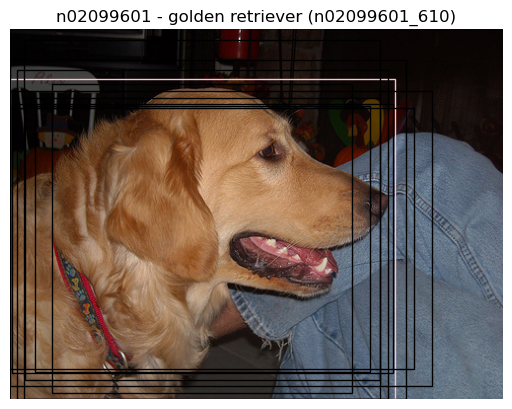

Category: n02326432


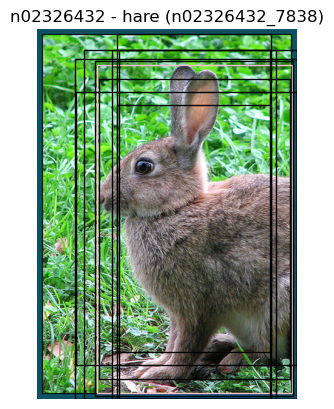

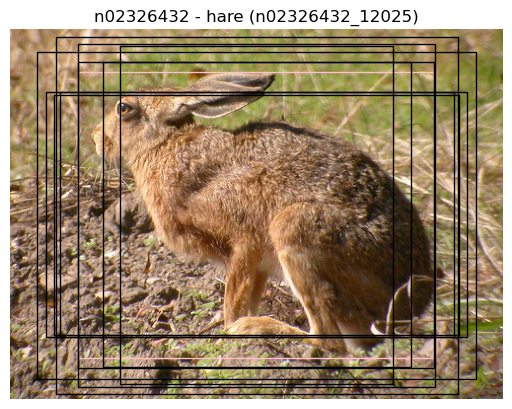

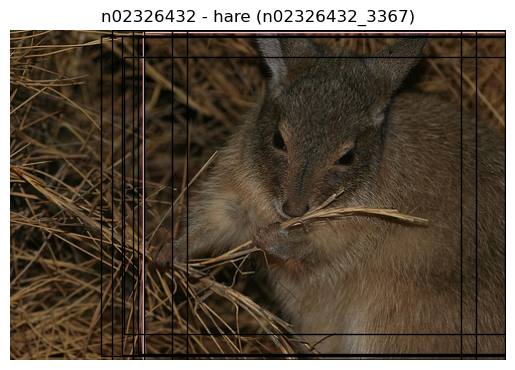

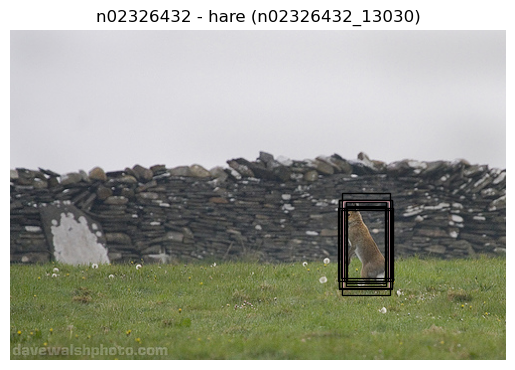

Category: n02397096


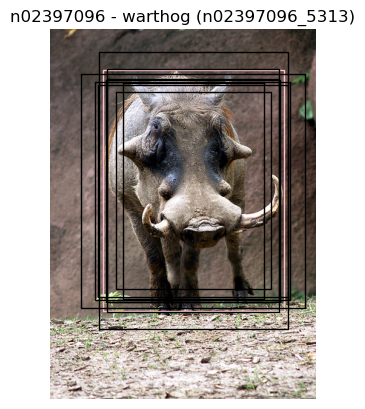

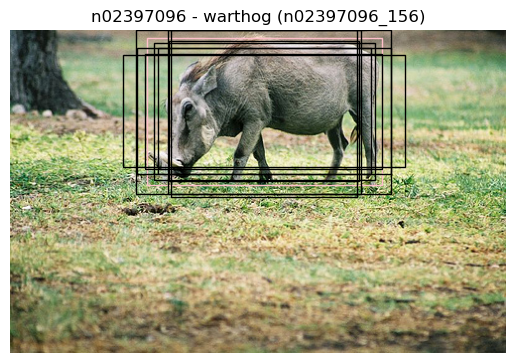

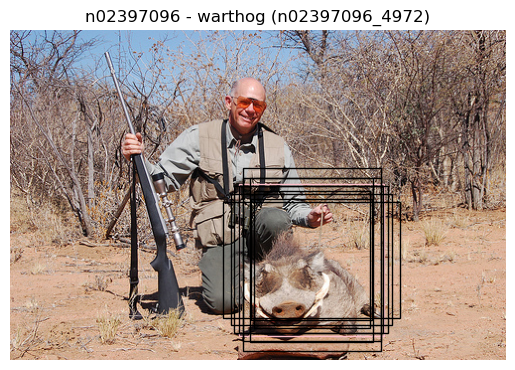

In [23]:
# Plot images with bounding boxes and calculate overlap percentage
for category in categories:
    print(f"Category: {category}")
    overlap_percentages = []
    for i, image_file1 in enumerate(selected_images[category]):
        image_name1, _ = os.path.splitext(image_file1)
        xml_file1 = os.path.join(annotation_folder, category, image_name1 + ".xml")
        if not os.path.exists(xml_file1):
            continue
        class_label1, bbox1 = parse_annotation(xml_file1)
        image_path1 = os.path.join(dataset_folder, category, image_file1)

        # Load the image
        image = plt.imread(image_path1)

        # Calculate max width
        max_width = bbox1[2] - bbox1[0]

        # Initialize list to store bounding boxes
        bboxes = []
        
        # Add the object of interest three times with bounding boxes centered around it
        for _ in range(3):
            # Calculate the center of the object of interest
            center_x = (bbox1[0] + bbox1[2]) / 2
            center_y = (bbox1[1] + bbox1[3]) / 2
            width = bbox1[2] - bbox1[0]
            height = bbox1[3] - bbox1[1]

            # Generate three bounding boxes for each object
            for _ in range(3):  # Change 3 to the desired number of bounding boxes
                # Randomly vary the width and height of the bounding box
                new_width = width + random.randint(-width // 4, width // 4)
                new_height = height + random.randint(-height // 4, height // 4)

                # Calculate the new bounding box coordinates
                new_xmin = max(0, int(center_x - new_width / 2))
                new_ymin = max(0, int(center_y - new_height / 2))
                new_xmax = min(image.shape[1], int(center_x + new_width / 2))
                new_ymax = min(image.shape[0], int(center_y + new_height / 2))

                # Append the new bounding box to the list
                bboxes.append((new_xmin, new_ymin, new_xmax, new_ymax))

        # Plot the image with the bounding boxes
        plot_image_with_bboxes(image_path1, class_label1, bbox1, bboxes, image_name1)
